<a href="https://colab.research.google.com/github/AKIMI18/BIOSCAN-AI-MODEL-ACCURACY/blob/main/Bioscan_AI_Model_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [737]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [738]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/sdx.csv")
print(df)

     Unnamed: 0                                         Image Path   Area  \
0             0  Images for Segmentation/Right_1688545144297266...   1025   
1             1  Images for Segmentation/Right_1687157108088791...  65314   
2             2  Images for Segmentation/Left_1671190392754600.jpg  11142   
3             3  Images for Segmentation/Right_1688373230069380...  12300   
4             4  Images for Segmentation/Left_1673525670935310.jpg  29475   
..          ...                                                ...    ...   
537         318            No DR Images/Right_1689329936041993.jpg   1721   
538         319            No DR Images/Right_1689670881620894.jpg  29244   
539         320            No DR Images/Right_1690183791842865.jpg  62625   
540         321            No DR Images/Right_1689255897525184.jpg  21828   
541         322            No DR Images/Right_1690202008395496.jpg  52030   

     N_End  N_Inter  Median Tortuosity        Length     Perimeter  \
0    

### **IMPORT LIBRARIES**

In [739]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score ,roc_auc_score ,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier
import statistics

### **EDA**

In [740]:
pip install ydata-profiling

In [741]:
!pip install --upgrade Pillow

In [742]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### PREPROCESSING


In [743]:
df

,Unnamed: 0,Image Path,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output
0,0,Images for Segmentation/Right_1688545144297266...,1025,50,3,1.071638,260.630461,541.168614,NaN,NaN,NaN,0.892552,0.816501,0.789974,1.228498,1
1,1,Images for Segmentation/Right_1687157108088791...,65314,471,638,1.076850,10962.331080,22389.446520,85.111429,59.092019,83.769675,1.571816,1.543596,1.523677,0.715295,1
2,2,Images for Segmentation/Left_1671190392754600.jpg,11142,138,55,1.078887,2039.622146,4359.491050,78.667261,67.371746,65.385552,1.181046,1.289428,1.294678,0.074207,1
3,3,Images for Segmentation/Right_1688373230069380...,12300,82,78,1.081413,2156.493714,4735.494008,91.093207,64.784563,109.653824,1.225766,1.269581,1.277442,0.384346,1
4,4,Images for Segmentation/Left_1673525670935310.jpg,29475,135,116,1.073051,4339.403888,9280.847973,103.101019,50.328959,105.283969,1.318766,1.276331,1.267225,1.489503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,318,No DR Images/Right_1689329936041993.jpg,1721,73,11,1.074617,592.544246,915.969696,NaN,NaN,NaN,0.944925,0.856298,0.804619,1.607047,0
538,319,No DR Images/Right_1689670881620894.jpg,29244,209,128,1.077710,5229.830163,10626.533400,89.829701,51.577899,91.101706,1.389114,1.372738,1.360155,0.648233,0
539,320,No DR Images/Right_1690183791842865.jpg,62625,221,325,1.078365,11092.361080,22488.441830,96.134665,58.446364,94.188208,1.560200,1.550929,1.532844,0.505882,0
540,321,No DR Images/Right_1689255897525184.jpg,21828,151,108,1.079359,4484.561444,9088.274380,97.133620,53.772340,96.490444,1.348828,1.430518,1.423908,0.095528,0


In [744]:
df.drop(['Unnamed: 0', 'Image Path'], axis=1, inplace=True)


In [745]:
df.fillna(df.mean())

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output
0,1025,50,3,1.071638,260.630461,541.168614,92.578992,52.270656,93.575772,0.892552,0.816501,0.789974,1.228498,1
1,65314,471,638,1.076850,10962.331080,22389.446520,85.111429,59.092019,83.769675,1.571816,1.543596,1.523677,0.715295,1
2,11142,138,55,1.078887,2039.622146,4359.491050,78.667261,67.371746,65.385552,1.181046,1.289428,1.294678,0.074207,1
3,12300,82,78,1.081413,2156.493714,4735.494008,91.093207,64.784563,109.653824,1.225766,1.269581,1.277442,0.384346,1
4,29475,135,116,1.073051,4339.403888,9280.847973,103.101019,50.328959,105.283969,1.318766,1.276331,1.267225,1.489503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1721,73,11,1.074617,592.544246,915.969696,92.578992,52.270656,93.575772,0.944925,0.856298,0.804619,1.607047,0
538,29244,209,128,1.077710,5229.830163,10626.533400,89.829701,51.577899,91.101706,1.389114,1.372738,1.360155,0.648233,0
539,62625,221,325,1.078365,11092.361080,22488.441830,96.134665,58.446364,94.188208,1.560200,1.550929,1.532844,0.505882,0
540,21828,151,108,1.079359,4484.561444,9088.274380,97.133620,53.772340,96.490444,1.348828,1.430518,1.423908,0.095528,0


In [746]:
df.corr()

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output
Area,1.000000,0.724427,0.880407,0.115729,0.987577,0.991763,0.027785,0.260919,0.032154,0.937330,0.911867,0.901768,-0.349591,-0.436815
N_End,0.724427,1.000000,0.783110,0.010454,0.771357,0.759464,-0.019388,0.168552,-0.010534,0.710705,0.679400,0.663581,-0.292752,-0.280120
N_Inter,0.880407,0.783110,1.000000,0.081987,0.886284,0.886068,-0.022419,0.278623,-0.004512,0.811904,0.783366,0.769052,-0.275519,-0.369141
Median Tortuosity,0.115729,0.010454,0.081987,1.000000,0.096575,0.110046,0.005468,0.089821,0.047454,0.145655,0.157787,0.165499,-0.005242,0.012943
Length,0.987577,0.771357,0.886284,0.096575,1.000000,0.998564,0.024511,0.243412,0.027767,0.939378,0.912286,0.900066,-0.362413,-0.430080
Perimeter,0.991763,0.759464,0.886068,0.110046,0.998564,1.000000,0.030004,0.252350,0.034070,0.943752,0.917789,0.906380,-0.362681,-0.437789
Mean Branching Angle,0.027785,-0.019388,-0.022419,0.005468,0.024511,0.030004,1.000000,-0.175977,0.887682,0.009891,0.014929,0.013344,0.009604,-0.029901
Std Branching Angle,0.260919,0.168552,0.278623,0.089821,0.243412,0.252350,-0.175977,1.000000,-0.088352,0.303269,0.337928,0.348557,-0.137283,-0.118930
Median Branching Angle,0.032154,-0.010534,-0.004512,0.047454,0.027767,0.034070,0.887682,-0.088352,1.000000,0.026180,0.038281,0.039704,0.016300,-0.035053
D0,0.937330,0.710705,0.811904,0.145655,0.939378,0.943752,0.009891,0.303269,0.026180,1.000000,0.983635,0.973992,-0.420596,-0.416860


In [747]:
correlation_matrix = df.corr()


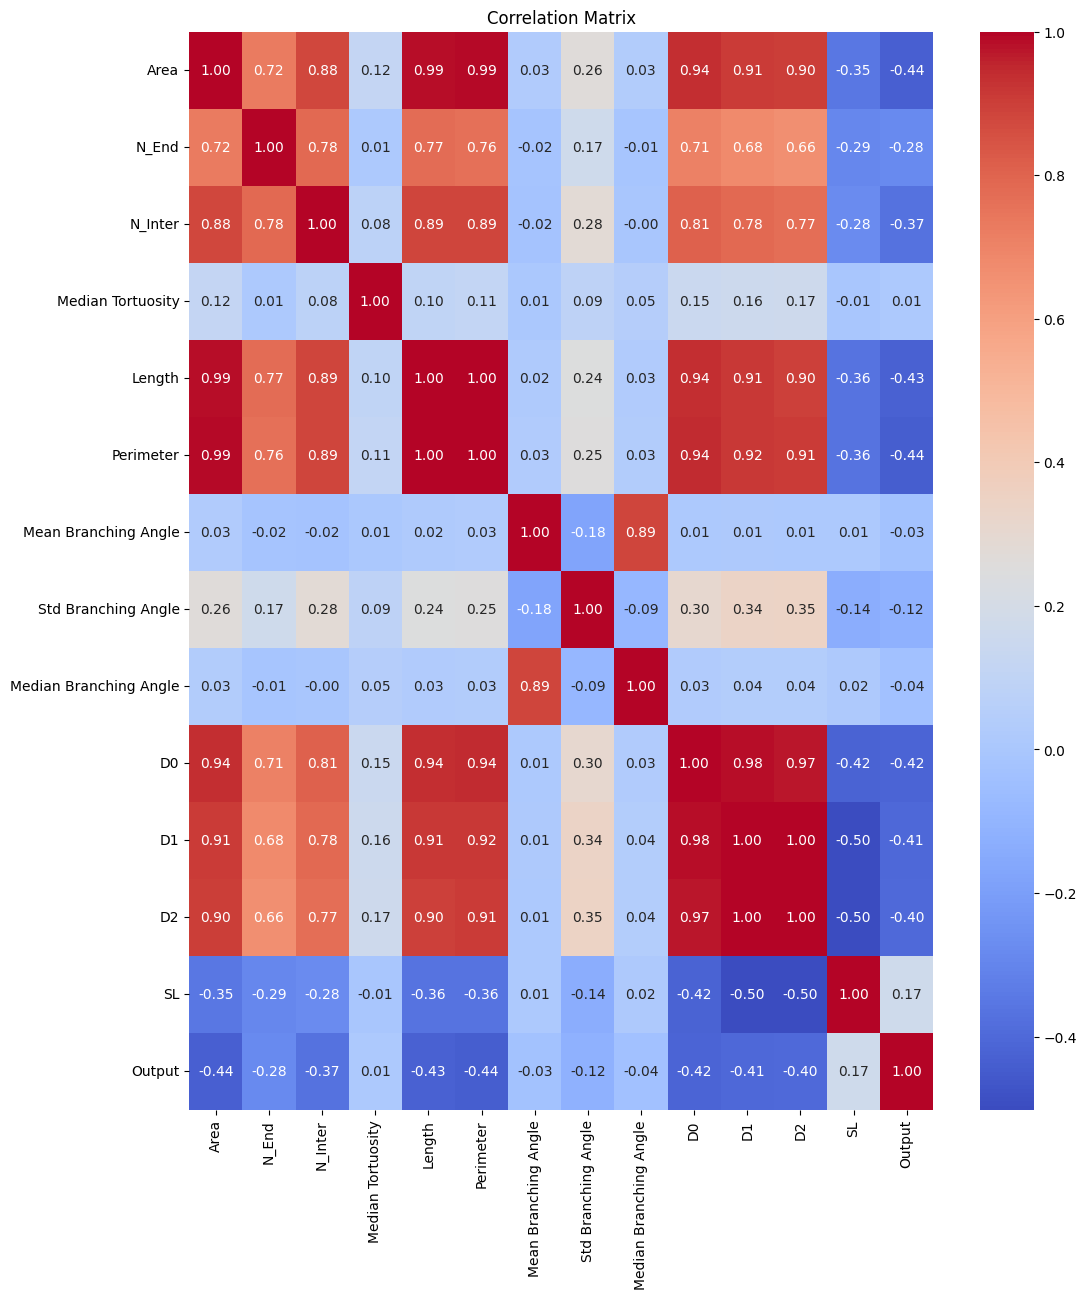

In [748]:
plt.figure(figsize=(12,14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [749]:
df.head()

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output
0,1025,50,3,1.071638,260.630461,541.168614,NaN,NaN,NaN,0.892552,0.816501,0.789974,1.228498,1
1,65314,471,638,1.076850,10962.331080,22389.446520,85.111429,59.092019,83.769675,1.571816,1.543596,1.523677,0.715295,1
2,11142,138,55,1.078887,2039.622146,4359.491050,78.667261,67.371746,65.385552,1.181046,1.289428,1.294678,0.074207,1
3,12300,82,78,1.081413,2156.493714,4735.494008,91.093207,64.784563,109.653824,1.225766,1.269581,1.277442,0.384346,1
4,29475,135,116,1.073051,4339.403888,9280.847973,103.101019,50.328959,105.283969,1.318766,1.276331,1.267225,1.489503,1


In [750]:
filtered_values_0 = df.loc[df['Output'] == 0, 'D2']

D2_with_0 = filtered_values_0.describe()

print(D2_with_0)


mode_value_0 = statistics.mode(filtered_values_0)

print("Mode:", mode_value_0)



count    323.000000
mean       1.359698
std        0.133409
min        0.804619
25%        1.279845
50%        1.402837
75%        1.461947
max        1.533681
Name: D2, dtype: float64
Mode: 1.474290063


In [751]:
filtered_values_1 = df.loc[df['Output'] == 1, 'D2']

D2_with_1 = filtered_values_1.describe()

print(D2_with_1)

mode_value_1 = statistics.mode(filtered_values_1)

print("Mode:", mode_value_1)

count    219.000000
mean       1.227139
std        0.169813
min        0.787154
25%        1.110638
50%        1.266499
75%        1.366989
max        1.523677
Name: D2, dtype: float64
Mode: 1.321885979


In [752]:
print(df.duplicated().sum())


10


In [753]:
df.drop_duplicates(inplace=True)
print(df)

      Area  N_End  N_Inter  Median Tortuosity        Length     Perimeter  \
0     1025     50        3           1.071638    260.630461    541.168614   
1    65314    471      638           1.076850  10962.331080  22389.446520   
2    11142    138       55           1.078887   2039.622146   4359.491050   
3    12300     82       78           1.081413   2156.493714   4735.494008   
4    29475    135      116           1.073051   4339.403888   9280.847973   
..     ...    ...      ...                ...           ...           ...   
537   1721     73       11           1.074617    592.544246    915.969696   
538  29244    209      128           1.077710   5229.830163  10626.533400   
539  62625    221      325           1.078365  11092.361080  22488.441830   
540  21828    151      108           1.079359   4484.561444   9088.274380   
541  52030    312      219           1.079669   9612.667583  19437.832170   

     Mean Branching Angle  Std Branching Angle  Median Branching Angle  \
0

In [754]:
df.shape

(532, 14)

In [755]:
df

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output
0,1025,50,3,1.071638,260.630461,541.168614,NaN,NaN,NaN,0.892552,0.816501,0.789974,1.228498,1
1,65314,471,638,1.076850,10962.331080,22389.446520,85.111429,59.092019,83.769675,1.571816,1.543596,1.523677,0.715295,1
2,11142,138,55,1.078887,2039.622146,4359.491050,78.667261,67.371746,65.385552,1.181046,1.289428,1.294678,0.074207,1
3,12300,82,78,1.081413,2156.493714,4735.494008,91.093207,64.784563,109.653824,1.225766,1.269581,1.277442,0.384346,1
4,29475,135,116,1.073051,4339.403888,9280.847973,103.101019,50.328959,105.283969,1.318766,1.276331,1.267225,1.489503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1721,73,11,1.074617,592.544246,915.969696,NaN,NaN,NaN,0.944925,0.856298,0.804619,1.607047,0
538,29244,209,128,1.077710,5229.830163,10626.533400,89.829701,51.577899,91.101706,1.389114,1.372738,1.360155,0.648233,0
539,62625,221,325,1.078365,11092.361080,22488.441830,96.134665,58.446364,94.188208,1.560200,1.550929,1.532844,0.505882,0
540,21828,151,108,1.079359,4484.561444,9088.274380,97.133620,53.772340,96.490444,1.348828,1.430518,1.423908,0.095528,0


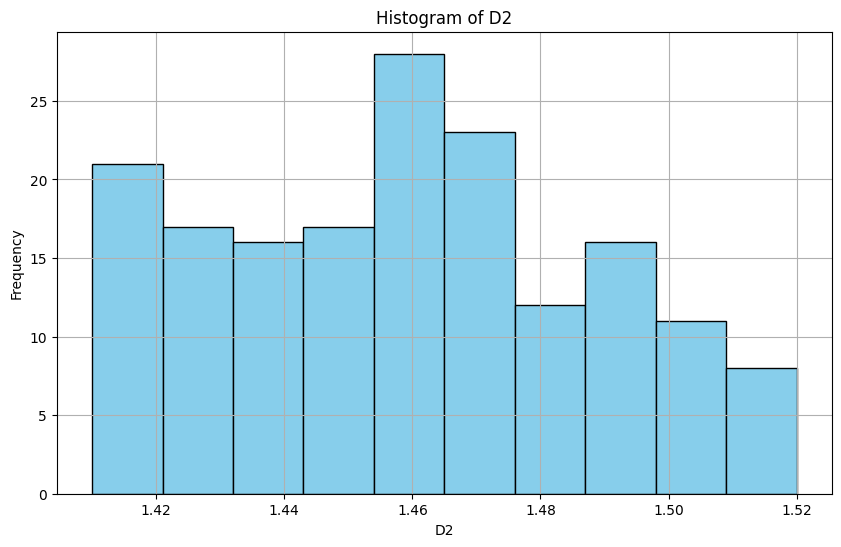

In [756]:

column_name = 'D2'


plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=10, color='skyblue', edgecolor='black',range=(1.41, 1.52))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.grid(True)
plt.show()


In [757]:
def compare_with_threshold(dataset, column_name):
    threshold2 = 1.519
    new_output = []

    for value in dataset[column_name]:
        if value < threshold2:
            new_output.append(0)
        else:
            new_output.append(1)

    dataset['new_output'] = new_output
    return dataset

In [758]:
df = compare_with_threshold(df, 'D2')


In [759]:
df

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
0,1025,50,3,1.071638,260.630461,541.168614,NaN,NaN,NaN,0.892552,0.816501,0.789974,1.228498,1,0
1,65314,471,638,1.076850,10962.331080,22389.446520,85.111429,59.092019,83.769675,1.571816,1.543596,1.523677,0.715295,1,1
2,11142,138,55,1.078887,2039.622146,4359.491050,78.667261,67.371746,65.385552,1.181046,1.289428,1.294678,0.074207,1,0
3,12300,82,78,1.081413,2156.493714,4735.494008,91.093207,64.784563,109.653824,1.225766,1.269581,1.277442,0.384346,1,0
4,29475,135,116,1.073051,4339.403888,9280.847973,103.101019,50.328959,105.283969,1.318766,1.276331,1.267225,1.489503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1721,73,11,1.074617,592.544246,915.969696,NaN,NaN,NaN,0.944925,0.856298,0.804619,1.607047,0,0
538,29244,209,128,1.077710,5229.830163,10626.533400,89.829701,51.577899,91.101706,1.389114,1.372738,1.360155,0.648233,0,0
539,62625,221,325,1.078365,11092.361080,22488.441830,96.134665,58.446364,94.188208,1.560200,1.550929,1.532844,0.505882,0,1
540,21828,151,108,1.079359,4484.561444,9088.274380,97.133620,53.772340,96.490444,1.348828,1.430518,1.423908,0.095528,0,0


### **OUTLIERS**




<ipython-input-760-38efe2e2cf32>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Area'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-760-38efe2e2cf32>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gui

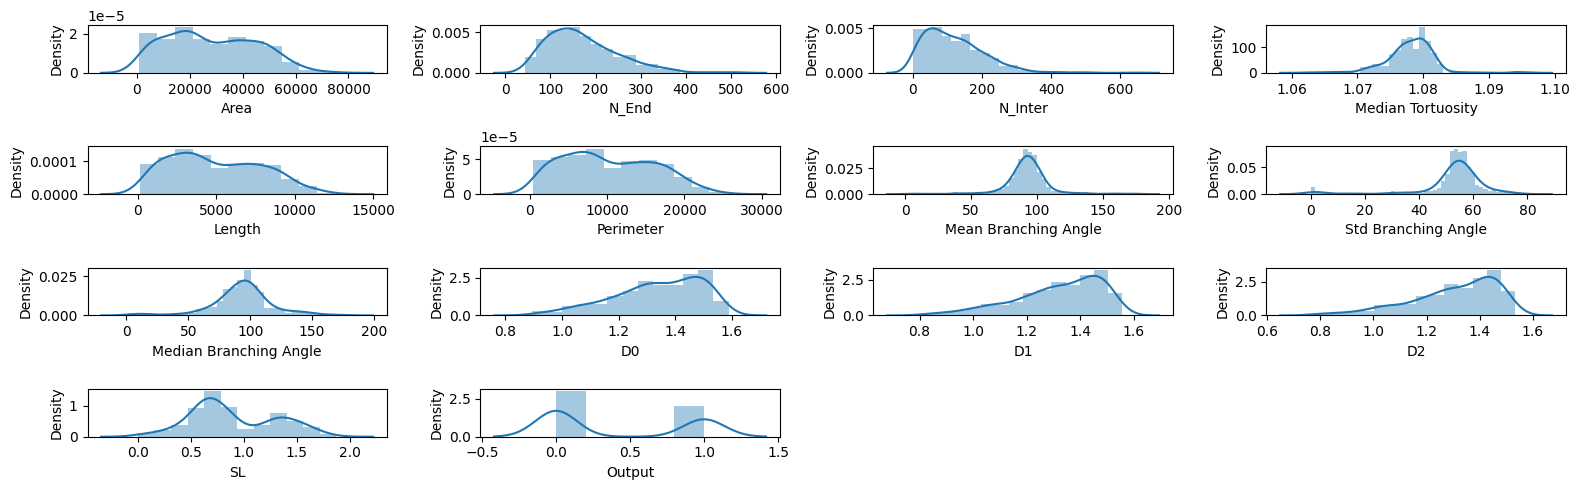

In [760]:
plt.figure(figsize=(16,5))
plt.subplot(4,4,1)
sns.distplot(df['Area'])

plt.subplot(4,4,2)
sns.distplot(df['N_End'])

plt.subplot(4,4,3)
sns.distplot(df['N_Inter'])

plt.subplot(4,4,4)
sns.distplot(df['Median Tortuosity'])

plt.subplot(4,4,5)
sns.distplot(df['Length'])

plt.subplot(4,4,6)
sns.distplot(df['Perimeter'])

plt.subplot(4,4,7)
sns.distplot(df['Mean Branching Angle'])

plt.subplot(4,4,8)
sns.distplot(df['Std Branching Angle'])

plt.subplot(4,4,9)
sns.distplot(df['Median Branching Angle'])

plt.subplot(4,4,10)
sns.distplot(df['D0'])

plt.subplot(4,4,11)
sns.distplot(df['D1'])

plt.subplot(4,4,12)
sns.distplot(df['D2'])

plt.subplot(4,4,13)
sns.distplot(df['SL'])

plt.subplot(4,4,14)
sns.distplot(df['Output'])



plt.tight_layout()

plt.show()

In [761]:
df.describe()

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,499.000000,499.000000,499.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,28102.060150,171.310150,119.035714,1.078040,4944.972416,10209.656482,92.612103,52.244587,93.581934,1.339343,1.319762,1.304678,0.900464,0.402256,0.018797
std,16815.526915,78.920397,87.168174,0.003712,2896.936654,5904.177285,17.415795,13.138934,25.132463,0.155026,0.161696,0.163426,0.405792,0.490814,0.135935
min,818.000000,43.000000,0.000000,1.061408,129.719934,425.972655,1.395107,0.000000,1.301953,0.892552,0.816501,0.787154,0.003234,0.000000,0.000000
25%,14281.000000,113.000000,52.000000,1.076341,2554.726850,5342.269008,86.210680,51.661866,82.903747,1.239664,1.222793,1.206909,0.621688,0.000000,0.000000
50%,25639.000000,157.000000,105.000000,1.078332,4470.400870,9323.770376,92.856632,54.511355,94.909280,1.356893,1.353190,1.343706,0.793463,0.000000,0.000000
75%,41854.750000,217.000000,166.500000,1.080048,7316.912519,15016.819993,99.169006,57.630921,104.892392,1.468593,1.451074,1.436491,1.271858,1.000000,0.000000
max,74958.000000,510.000000,638.000000,1.096416,12521.901500,25505.935480,177.485047,77.713441,177.572455,1.589473,1.557003,1.533681,1.875291,1.000000,1.000000


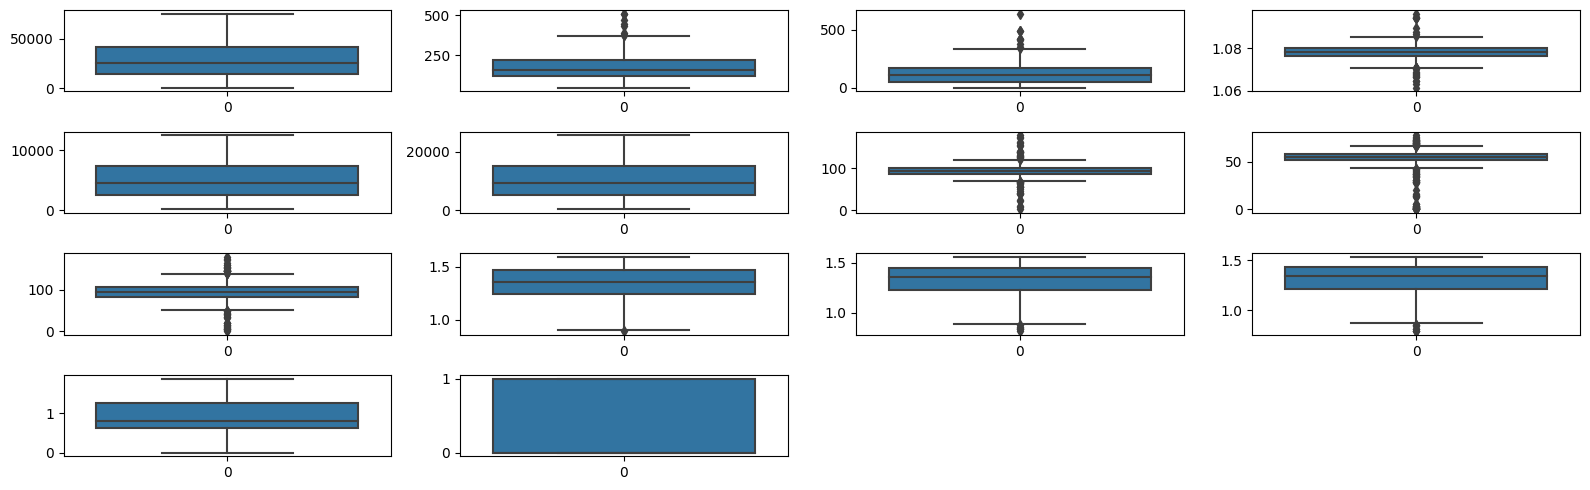

In [762]:
plt.figure(figsize=(16,5))
plt.subplot(4,4,1)
sns.boxplot(df['Area'])

plt.subplot(4,4,2)
sns.boxplot(df['N_End'])

plt.subplot(4,4,3)
sns.boxplot(df['N_Inter'])

plt.subplot(4,4,4)
sns.boxplot(df['Median Tortuosity'])

plt.subplot(4,4,5)
sns.boxplot(df['Length'])

plt.subplot(4,4,6)
sns.boxplot(df['Perimeter'])

plt.subplot(4,4,7)
sns.boxplot(df['Mean Branching Angle'])

plt.subplot(4,4,8)
sns.boxplot(df['Std Branching Angle'])

plt.subplot(4,4,9)
sns.boxplot(df['Median Branching Angle'])

plt.subplot(4,4,10)
sns.boxplot(df['D0'])

plt.subplot(4,4,11)
sns.boxplot(df['D1'])

plt.subplot(4,4,12)
sns.boxplot(df['D2'])

plt.subplot(4,4,13)
sns.boxplot(df['SL'])

plt.subplot(4,4,14)
sns.boxplot(df['Output'])


plt.tight_layout()

plt.show()

In [763]:

per_Area_25 = df['Area'].quantile(0.25)
per_Area_75 = df['Area'].quantile(0.75)

per_N_End_25 = df['N_End'].quantile(0.25)
per_N_End_75 = df['N_End'].quantile(0.75)

per_N_Inter_25 = df['N_Inter'].quantile(0.25)
per_N_Inter_75 = df['N_Inter'].quantile(0.75)

per_Median_Tortuosity_25 = df['Median Tortuosity'].quantile(0.25)
per_Median_Tortuosity_75 = df['Median Tortuosity'].quantile(0.75)

per_Length_25 = df['Length'].quantile(0.25)
per_Length_75 = df['Length'].quantile(0.75)

per_Perimeter_25 = df['Perimeter'].quantile(0.25)
per_Perimeter_75 = df['Perimeter'].quantile(0.75)

per_Mean_Branching_Angle_25 = df['Mean Branching Angle'].quantile(0.25)
per_Mean_Branching_Angle_75 = df['Mean Branching Angle'].quantile(0.75)

per_Std_Branching_Angle_25 = df['Std Branching Angle'].quantile(0.25)
per_Std_Branching_Angle_75 = df['Std Branching Angle'].quantile(0.75)

per_Median_Branching_Angle_25 = df['Median Branching Angle'].quantile(0.25)
per_Median_Branching_Angle_75 = df['Median Branching Angle'].quantile(0.75)

per_D0_25 = df['D0'].quantile(0.25)
per_D0_75 = df['D0'].quantile(0.75)

per_D1_25 = df['D1'].quantile(0.25)
per_D1_75 = df['D1'].quantile(0.75)

per_D2_25 = df['D2'].quantile(0.25)
per_D2_75 = df['D2'].quantile(0.75)

per_SL_25 = df['SL'].quantile(0.25)
per_SL_75 = df['SL'].quantile(0.75)

per_Output_25 = df['Output'].quantile(0.25)
per_Output_75 = df['Output'].quantile(0.75)



In [764]:
print(per_Area_25)
print(per_Area_75)

print(per_N_End_75)
print(per_N_End_75)

print(per_N_Inter_25)
print(per_N_Inter_75)

print(per_Median_Tortuosity_25)
print(per_Median_Tortuosity_75)

print(per_Length_25)
print(per_Length_75)

print(per_Perimeter_25)
print(per_Perimeter_75)

print(per_Mean_Branching_Angle_25)
print(per_Mean_Branching_Angle_75)

print(per_Std_Branching_Angle_25)
print(per_Std_Branching_Angle_75)

print(per_Median_Branching_Angle_25)
print(per_Median_Branching_Angle_75)

print(per_D0_25)
print(per_D0_75)

print(per_D1_25)
print(per_D1_75)

print(per_D2_25)
print(per_D2_75)

print(per_SL_25)
print(per_SL_75)

print(per_Output_25)
print(per_Output_75)



14281.0
41854.75
217.0
217.0
52.0
166.5
1.076341434
1.08004771725
2554.72685025
7316.9125185
5342.26900775
15016.8199925
86.210679965
99.16900602
51.661866180000004
57.630921355
82.90374658
104.8923921
1.23966378075
1.468593222
1.22279253075
1.4510736242500002
1.206908586
1.43649143325
0.6216876949
1.2718577865
0.0
1.0


In [765]:
iqr_Area = per_Area_75 - per_Area_25
print(iqr_Area)

iqr_N_End = per_N_End_75 - per_N_End_25
print(iqr_N_End)

iqr_N_Inter = per_N_Inter_75 - per_N_Inter_25
print(iqr_N_Inter)

iqr_Median_Tortuosity = per_Median_Tortuosity_75 - per_Median_Tortuosity_25
print(iqr_Median_Tortuosity)

iqr_Length = per_Length_75 - per_Length_25
print(iqr_Length)

iqr_Perimeter = per_Perimeter_75 - per_Perimeter_25
print(iqr_Perimeter)

iqr_Mean_Branching_Angle = per_Mean_Branching_Angle_75 - per_Mean_Branching_Angle_25
print(iqr_Mean_Branching_Angle)

iqr_Std_Branching_Angle = per_Std_Branching_Angle_75 - per_Std_Branching_Angle_25
print(iqr_Std_Branching_Angle)

iqr_Median_Branching_Angle = per_Median_Branching_Angle_75 - per_Median_Branching_Angle_25
print(iqr_Median_Branching_Angle)

iqr_D0 = per_D0_75 - per_D0_25
print(iqr_D0)

iqr_D1 = per_D1_75 - per_D1_25
print(iqr_D1)

iqr_D2 = per_D2_75 - per_D2_25
print(iqr_D2)

iqr_SL = per_SL_75 - per_SL_25
print(iqr_SL)

iqr_Output = per_Output_75 - per_Output_25
print(iqr_Output)



27573.75
104.0
114.5
0.0037062832500001086
4762.18566825
9674.55098475
12.958326055
5.969055174999994
21.98864551999999
0.22892944125000003
0.22828109350000014
0.2295828472500001
0.6501700916
1.0


In [766]:
upper_limit_Area = per_Area_75 + 1.5 * iqr_Area
lower_limit_Area = per_Area_25 - 1.5 * iqr_Area
print("Upper limit_Area",upper_limit_Area)
print("Lower limit_Area",lower_limit_Area)

upper_limit_N_End = per_N_End_75 + 1.5 * iqr_N_End
lower_limit_N_End = per_N_End_25 - 1.5 * iqr_N_End
print("Upper limit_N_End",upper_limit_N_End)
print("Lower limit_N_End",lower_limit_N_End)

upper_limit_N_Inter = per_N_Inter_75 + 1.5 * iqr_N_Inter
lower_limit_N_Inter = per_N_Inter_25 - 1.5 * iqr_N_Inter
print("Upper limit_N_Inter",upper_limit_N_Inter)
print("Lower limit_N_Inter",lower_limit_N_Inter)

upper_limit_Median_Tortuosity = per_Median_Tortuosity_75 + 1.5 * iqr_Median_Tortuosity
lower_limit_Median_Tortuosity = per_Median_Tortuosity_25 - 1.5 * iqr_Median_Tortuosity
print("Upper limit_Median_Tortuosity",upper_limit_Median_Tortuosity)
print("Lower limit_Median_Tortuosity",lower_limit_Median_Tortuosity)

upper_limit_Length = per_Length_75 + 1.5 * iqr_Length
lower_limit_Length = per_Length_25 - 1.5 * iqr_Length
print("Upper limit_Length",upper_limit_Length)
print("Lower limit_Length",lower_limit_Length)

upper_limit_Perimeter = per_Perimeter_75 + 1.5 * iqr_Perimeter
lower_limit_Perimeter = per_Perimeter_25 - 1.5 * iqr_Perimeter
print("Upper limit_Perimeter",upper_limit_Perimeter)
print("Lower limit_Perimeter",lower_limit_Perimeter)

upper_limit_Mean_Branching_Angle = per_Mean_Branching_Angle_75 + 1.5 * iqr_Mean_Branching_Angle
lower_limit_Mean_Branching_Angle = per_Mean_Branching_Angle_25 - 1.5 * iqr_Mean_Branching_Angle
print("Upper limit_Mean_Branching_Angle",upper_limit_Mean_Branching_Angle)
print("Lower limit_Mean_Branching_Angle",lower_limit_Mean_Branching_Angle)

upper_limit_Std_Branching_Angle = per_Std_Branching_Angle_75 + 1.5 * iqr_Std_Branching_Angle
lower_limit_Std_Branching_Angle = per_Std_Branching_Angle_25 - 1.5 * iqr_Std_Branching_Angle
print("Upper limit_Std_Branching_Angle",upper_limit_Std_Branching_Angle)
print("Lower limit_Std_Branching_Angle",lower_limit_Std_Branching_Angle)

upper_limit_Median_Branching_Angle = per_Median_Branching_Angle_75 + 1.5 * iqr_Median_Branching_Angle
lower_limit_Median_Branching_Angle = per_Median_Branching_Angle_25 - 1.5 * iqr_Median_Branching_Angle
print("Upper limit_Median_Branching_Angle",upper_limit_Median_Branching_Angle)
print("Lower limit_Median_Branching_Angle",lower_limit_Median_Branching_Angle)

upper_limit_D0 = per_D0_75 + 1.5 * iqr_D0
lower_limit_D0 = per_D0_25 - 1.5 * iqr_D0
print("Upper limit_D0",upper_limit_D0)
print("Lower limit_D0",lower_limit_D0)

upper_limit_D1 = per_D1_75 + 1.5 * iqr_D1
lower_limit_D1 = per_D1_25 - 1.5 * iqr_D1
print("Upper limit_D1",upper_limit_D1)
print("Lower limit_D1",lower_limit_D1)

upper_limit_D2 = per_D2_75 + 1.5 * iqr_D2
lower_limit_D2 = per_D2_25 - 1.5 * iqr_D2
print("Upper limit_D2",upper_limit_D2)
print("Lower limit_D2",lower_limit_D2)

upper_limit_SL = per_SL_75 + 1.5 * iqr_SL
lower_limit_SL = per_SL_25 - 1.5 * iqr_SL
print("Upper limit_SL",upper_limit_SL)
print("Lower limit_SL",lower_limit_SL)

upper_limit_Output = per_Output_75 + 1.5 * iqr_Output
lower_limit_Output = per_Output_25 - 1.5 * iqr_Output
print("Upper limit_Output",upper_limit_Output)
print("Lower limit_Output",lower_limit_Output)



Upper limit_Area 83215.375
Lower limit_Area -27079.625
Upper limit_N_End 373.0
Lower limit_N_End -43.0
Upper limit_N_Inter 338.25
Lower limit_N_Inter -119.75
Upper limit_Median_Tortuosity 1.0856071421250002
Lower limit_Median_Tortuosity 1.0707820091249998
Upper limit_Length 14460.191020875001
Lower limit_Length -4588.551652125
Upper limit_Perimeter 29528.646469625
Lower limit_Perimeter -9169.557469374999
Upper limit_Mean_Branching_Angle 118.60649510249999
Lower limit_Mean_Branching_Angle 66.77319088249999
Upper limit_Std_Branching_Angle 66.58450411749999
Lower limit_Std_Branching_Angle 42.70828341750001
Upper limit_Median_Branching_Angle 137.87536038
Lower limit_Median_Branching_Angle 49.920778300000016
Upper limit_D0 1.811987383875
Lower limit_D0 0.8962696188749999
Upper limit_D1 1.7934952645000004
Lower limit_D1 0.8803708904999998
Upper limit_D2 1.7808657041250002
Lower limit_D2 0.8625343151249998
Upper limit_SL 2.2471129239
Lower limit_SL -0.35356744250000005
Upper limit_Output 2.5


### **Finding Outliers**

In [767]:
df[df['Area'] > upper_limit_Area]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [768]:
df[df['Area'] < lower_limit_Area]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [769]:
df[df['N_End'] > upper_limit_N_End]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
1,65314,471,638,1.076850,10962.331080,22389.44652,85.111429,59.092019,83.769675,1.571816,1.543596,1.523677,0.715295,1,1
251,58042,448,310,1.079669,11244.516710,22386.73202,92.464316,61.314062,92.076752,1.568220,1.524460,1.500831,0.883894,0,0
269,61921,510,344,1.077556,11105.448210,22529.40821,88.765446,56.534709,88.754636,1.576611,1.519457,1.488670,0.935398,0,0
271,40219,387,208,1.081630,7381.996575,15422.95042,82.451814,52.558674,81.085073,1.499327,1.493864,1.469055,0.198187,0,0
352,63399,377,316,1.076243,11801.278550,23506.56586,90.276729,54.227412,91.340911,1.578969,1.551093,1.533681,0.915394,0,1
388,61178,374,354,1.076219,10996.833610,21815.49948,88.556041,56.441990,81.447058,1.564019,1.537383,1.516949,0.814049,0,0
475,58563,510,416,1.073751,10871.752660,22036.06001,96.572075,52.188365,93.758556,1.573046,1.529351,1.503248,0.884032,0,0
521,65440,432,488,1.078186,11146.656840,22914.85186,85.096340,57.444814,82.482593,1.581097,1.530849,1.498379,0.856868,0,0


In [770]:
df[df['N_End'] < lower_limit_N_End]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [771]:
df[df['N_Inter'] > upper_limit_N_Inter]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
1,65314,471,638,1.076850,10962.331080,22389.44652,85.111429,59.092019,83.769675,1.571816,1.543596,1.523677,0.715295,1,1
129,55532,360,489,1.079669,8616.775747,18034.82885,86.209616,58.562042,84.289407,1.528682,1.511664,1.501618,0.620845,1,0
269,61921,510,344,1.077556,11105.448210,22529.40821,88.765446,56.534709,88.754636,1.576611,1.519457,1.488670,0.935398,0,0
388,61178,374,354,1.076219,10996.833610,21815.49948,88.556041,56.441990,81.447058,1.564019,1.537383,1.516949,0.814049,0,0
428,69698,274,379,1.078030,12521.901500,25505.93548,89.744599,53.544476,86.551766,1.589473,1.557003,1.533226,0.787017,0,1
431,58340,366,407,1.077593,10896.150050,21929.78462,88.889839,62.533069,87.662958,1.565369,1.522609,1.490775,0.855190,0,0
475,58563,510,416,1.073751,10871.752660,22036.06001,96.572075,52.188365,93.758556,1.573046,1.529351,1.503248,0.884032,0,0
515,59932,331,423,1.080897,9783.667689,20709.47091,89.232199,56.569440,91.111981,1.544393,1.511120,1.491287,0.766994,0,0
521,65440,432,488,1.078186,11146.656840,22914.85186,85.096340,57.444814,82.482593,1.581097,1.530849,1.498379,0.856868,0,0


In [772]:
df[df['N_Inter'] < lower_limit_N_Inter]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [773]:
df[df['Median Tortuosity'] > upper_limit_Median_Tortuosity]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
40,5978,57,19,1.094192,1049.797419,2404.627776,55.639875,63.404037,11.309932,1.075734,1.048469,1.043354,0.504267,1,0
98,7063,121,20,1.089845,1950.379287,3562.864499,38.990994,0.000000,38.990994,1.153562,1.084267,1.059545,1.538540,1,0
100,20067,72,87,1.087927,3495.074673,7412.607066,90.329741,57.856757,91.553193,1.316519,1.289975,1.284295,0.862107,1,0
127,22594,79,54,1.094326,3490.094433,7917.008219,86.171666,67.781165,79.959832,1.235950,1.232403,1.227877,1.196714,1,0
164,16468,96,78,1.086858,2651.477566,6023.389678,88.580494,63.438676,90.171572,1.230418,1.229363,1.226446,1.244759,1,0
174,2286,68,7,1.096416,443.673399,948.087445,93.179830,0.000000,93.179830,0.987706,0.961988,0.935176,1.264949,1,0
204,14517,63,37,1.094664,2134.634712,4675.135711,94.146036,75.055811,137.052701,1.231823,1.199271,1.194347,1.672414,1,0
242,45072,179,147,1.085659,6579.567954,14088.934040,89.115521,61.312901,84.093859,1.435124,1.420434,1.418428,0.663937,0,0
253,5644,105,17,1.094527,1098.478502,2551.380085,NaN,NaN,NaN,1.164007,1.218858,1.197842,0.900613,0,0


In [774]:
df[df['Median Tortuosity'] < lower_limit_Median_Tortuosity]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
49,7942,59,23,1.066994,1554.763821,3184.955770,69.226011,14.258942,62.805350,1.221270,1.153983,1.126877,1.631633,1,0
51,1802,49,3,1.061408,424.609914,777.430591,NaN,NaN,NaN,0.938808,0.929570,0.920062,0.647825,1,0
56,4239,148,23,1.067864,1127.225339,2131.733332,38.659563,15.128884,34.074607,1.134051,1.065024,1.032409,1.505663,1,0
77,3737,87,35,1.070604,929.762149,1941.370850,54.957678,72.633478,13.840654,1.033795,1.003119,0.994027,0.717759,1,0
99,3428,134,0,1.063182,1122.636007,1850.713996,NaN,NaN,NaN,1.103209,1.057897,1.034319,0.590798,1,0
109,5751,128,9,1.070604,1668.122658,2856.541556,NaN,NaN,NaN,1.138248,1.079645,1.059329,1.581202,1,0
135,6771,59,23,1.067531,1217.666503,2447.892711,108.722816,37.026191,93.179830,1.015127,1.008734,1.001162,0.974249,1,0
172,2308,95,22,1.066274,742.629478,1184.307791,NaN,NaN,NaN,0.931334,0.907954,0.896745,0.444433,1,0
176,41006,268,197,1.070604,7242.223713,13957.464780,94.457550,51.891560,90.187854,1.458971,1.442589,1.415367,0.436824,1,0
214,3689,51,41,1.070604,730.897998,1627.935208,66.124147,57.406822,30.963757,1.202221,1.089028,1.036952,1.778724,1,0


In [775]:
df[df['Length'] > upper_limit_Length]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [776]:
df[df['Length'] < lower_limit_Length]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [777]:
df[df['Perimeter'] > upper_limit_Perimeter]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [778]:
df[df['Perimeter'] < lower_limit_Perimeter]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [779]:
df[df['Mean Branching Angle'] > upper_limit_Mean_Branching_Angle]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
16,2553,99,14,1.072962,780.747818,1243.734198,123.125253,28.905371,136.452401,0.995461,0.908368,0.870626,1.309929,1,0
21,6136,97,18,1.074534,1313.744309,2715.314067,136.693596,5.110716,137.853681,1.148833,1.051576,1.000911,0.997258,1,0
62,5743,81,15,1.077593,1064.437514,2271.561759,127.352003,0.000000,127.352003,1.034450,0.991414,0.987759,1.403347,1,0
67,10093,85,17,1.076163,1815.513078,3942.320344,128.864072,33.537003,121.844157,1.164020,1.139451,1.134606,1.355780,1,0
70,9572,114,12,1.077277,1773.790309,4063.771137,158.230909,3.293035,159.354732,1.168583,1.097171,1.079499,1.409704,1,0
81,18784,121,48,1.077277,3072.266983,6555.040615,126.968735,55.360896,144.452288,1.270875,1.255716,1.250857,1.424359,1,0
82,16498,228,40,1.074365,2993.020184,6659.263920,138.069306,56.624858,152.318938,1.297993,1.348340,1.364851,0.312700,1,0
85,6107,63,25,1.079669,1017.924697,2173.282538,152.816799,20.704243,152.634490,1.174492,1.152295,1.117313,1.315577,1,0
96,4619,69,8,1.081833,1027.278536,2082.152596,172.957772,0.296796,173.167638,1.055771,1.020322,0.995947,0.964528,1,0
119,4052,154,22,1.082040,1185.429531,2039.128209,131.278599,2.502525,131.278599,1.073847,0.965899,0.921078,1.798894,1,0


In [780]:
df[df['Mean Branching Angle'] < lower_limit_Mean_Branching_Angle]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
9,5736,186,30,1.072489,1549.670361,2805.943576,50.291119,53.862484,19.076042,1.097456,1.058651,1.050052,1.486254,1,0
13,2430,69,27,1.079543,501.329076,1215.817459,21.069289,2.080078,20.282559,1.209257,1.111972,1.062104,1.539755,1,0
25,15180,96,25,1.078240,2689.536489,5536.387586,61.378892,68.099983,5.795886,1.220358,1.202102,1.197579,1.300858,1,0
40,5978,57,19,1.094192,1049.797419,2404.627776,55.639875,63.404037,11.309932,1.075734,1.048469,1.043354,0.504267,1,0
56,4239,148,23,1.067864,1127.225339,2131.733332,38.659563,15.128884,34.074607,1.134051,1.065024,1.032409,1.505663,1,0
58,7430,129,27,1.077577,1856.215024,3264.940618,54.135226,54.864741,43.636845,1.124299,1.075734,1.058555,1.439304,1,0
59,11535,95,43,1.079246,1865.618953,4143.587371,45.804201,59.806720,20.159700,1.151276,1.142689,1.142169,1.345573,1,0
61,16665,135,35,1.076970,2826.461627,5531.426258,62.853657,42.602841,47.829176,1.223796,1.198625,1.187970,0.758954,1,0
69,5023,116,24,1.076476,1412.087026,2451.840979,5.839194,3.349642,5.839194,1.052344,1.013045,1.009857,1.467451,1,0
77,3737,87,35,1.070604,929.762149,1941.370850,54.957678,72.633478,13.840654,1.033795,1.003119,0.994027,0.717759,1,0


In [781]:
df[df['Std Branching Angle'] > upper_limit_Std_Branching_Angle]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
2,11142,138,55,1.078887,2039.622146,4359.491050,78.667261,67.371746,65.385552,1.181046,1.289428,1.294678,0.074207,1,0
25,15180,96,25,1.078240,2689.536489,5536.387586,61.378892,68.099983,5.795886,1.220358,1.202102,1.197579,1.300858,1,0
35,9649,115,48,1.076243,1773.035194,3669.036072,90.036531,71.200835,74.778212,1.118540,1.083989,1.066254,1.229251,1,0
38,13469,79,63,1.077593,2501.043783,5150.623951,80.932382,70.157467,35.373298,1.270418,1.243693,1.231244,0.607114,1,0
43,3474,77,24,1.079935,602.611214,1320.212337,69.144051,67.594302,15.124007,1.155963,1.085940,1.040683,1.585348,1,0
48,17953,116,97,1.076471,2488.262804,5572.527630,101.275727,74.071321,146.103914,1.226244,1.161855,1.157227,1.731072,1,0
60,29187,175,208,1.081439,4428.845697,9391.249127,87.716119,66.932972,102.658509,1.306883,1.301619,1.294657,1.330771,1,0
77,3737,87,35,1.070604,929.762149,1941.370850,54.957678,72.633478,13.840654,1.033795,1.003119,0.994027,0.717759,1,0
113,17676,108,73,1.081821,2837.631663,6075.183618,84.844080,70.081008,99.889667,1.255410,1.219932,1.218595,1.637167,1,0
120,9025,104,60,1.085316,1701.604701,3533.519262,74.946469,73.354186,51.340192,1.121549,1.119975,1.102557,0.944058,1,0


In [782]:
df[df['Std Branching Angle'] < lower_limit_Std_Branching_Angle]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
13,2430,69,27,1.079543,501.329076,1215.817459,21.069289,2.080078,20.282559,1.209257,1.111972,1.062104,1.539755,1,0
16,2553,99,14,1.072962,780.747818,1243.734198,123.125253,28.905371,136.452401,0.995461,0.908368,0.870626,1.309929,1,0
19,10747,113,32,1.081057,2458.438960,4714.432175,73.973321,0.777376,73.771503,1.185475,1.175174,1.165356,1.287773,1,0
21,6136,97,18,1.074534,1313.744309,2715.314067,136.693596,5.110716,137.853681,1.148833,1.051576,1.000911,0.997258,1,0
49,7942,59,23,1.066994,1554.763821,3184.955770,69.226011,14.258942,62.805350,1.221270,1.153983,1.126877,1.631633,1,0
56,4239,148,23,1.067864,1127.225339,2131.733332,38.659563,15.128884,34.074607,1.134051,1.065024,1.032409,1.505663,1,0
61,16665,135,35,1.076970,2826.461627,5531.426258,62.853657,42.602841,47.829176,1.223796,1.198625,1.187970,0.758954,1,0
62,5743,81,15,1.077593,1064.437514,2271.561759,127.352003,0.000000,127.352003,1.034450,0.991414,0.987759,1.403347,1,0
63,5301,103,20,1.082228,1261.359858,2298.655121,102.642910,37.565634,99.120192,1.019862,1.015344,1.003000,1.359489,1,0
67,10093,85,17,1.076163,1815.513078,3942.320344,128.864072,33.537003,121.844157,1.164020,1.139451,1.134606,1.355780,1,0


In [783]:
df[df['Median Branching Angle'] > upper_limit_Median_Branching_Angle]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
14,34564,150,99,1.080748,5349.389836,11535.056490,116.999125,50.383979,140.592195,1.377395,1.370387,1.360355,0.575931,1,0
48,17953,116,97,1.076471,2488.262804,5572.527630,101.275727,74.071321,146.103914,1.226244,1.161855,1.157227,1.731072,1,0
70,9572,114,12,1.077277,1773.790309,4063.771137,158.230909,3.293035,159.354732,1.168583,1.097171,1.079499,1.409704,1,0
81,18784,121,48,1.077277,3072.266983,6555.040615,126.968735,55.360896,144.452288,1.270875,1.255716,1.250857,1.424359,1,0
82,16498,228,40,1.074365,2993.020184,6659.263920,138.069306,56.624858,152.318938,1.297993,1.348340,1.364851,0.312700,1,0
85,6107,63,25,1.079669,1017.924697,2173.282538,152.816799,20.704243,152.634490,1.174492,1.152295,1.117313,1.315577,1,0
96,4619,69,8,1.081833,1027.278536,2082.152596,172.957772,0.296796,173.167638,1.055771,1.020322,0.995947,0.964528,1,0
122,6389,59,25,1.072498,1218.975957,2438.541556,117.599772,58.617403,143.085410,1.200408,1.180169,1.145597,0.690167,1,0
130,16926,93,56,1.074612,2593.148775,5635.999851,124.996061,47.217319,145.414759,1.244418,1.330350,1.346205,0.062630,1,0
154,17290,132,43,1.078426,3373.944876,6788.805117,135.174247,29.049793,143.540328,1.247239,1.225999,1.216492,1.359777,1,0


In [784]:
df[df['Median Branching Angle'] < lower_limit_Median_Branching_Angle]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
9,5736,186,30,1.072489,1549.670361,2805.943576,50.291119,53.862484,19.076042,1.097456,1.058651,1.050052,1.486254,1,0
13,2430,69,27,1.079543,501.329076,1215.817459,21.069289,2.080078,20.282559,1.209257,1.111972,1.062104,1.539755,1,0
25,15180,96,25,1.078240,2689.536489,5536.387586,61.378892,68.099983,5.795886,1.220358,1.202102,1.197579,1.300858,1,0
38,13469,79,63,1.077593,2501.043783,5150.623951,80.932382,70.157467,35.373298,1.270418,1.243693,1.231244,0.607114,1,0
40,5978,57,19,1.094192,1049.797419,2404.627776,55.639875,63.404037,11.309932,1.075734,1.048469,1.043354,0.504267,1,0
43,3474,77,24,1.079935,602.611214,1320.212337,69.144051,67.594302,15.124007,1.155963,1.085940,1.040683,1.585348,1,0
56,4239,148,23,1.067864,1127.225339,2131.733332,38.659563,15.128884,34.074607,1.134051,1.065024,1.032409,1.505663,1,0
58,7430,129,27,1.077577,1856.215024,3264.940618,54.135226,54.864741,43.636845,1.124299,1.075734,1.058555,1.439304,1,0
59,11535,95,43,1.079246,1865.618953,4143.587371,45.804201,59.806720,20.159700,1.151276,1.142689,1.142169,1.345573,1,0
61,16665,135,35,1.076970,2826.461627,5531.426258,62.853657,42.602841,47.829176,1.223796,1.198625,1.187970,0.758954,1,0


In [785]:
df[df['D0'] > upper_limit_D0]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [786]:
df[df['D0'] < lower_limit_D0]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
0,1025,50,3,1.071638,260.630461,541.168614,NaN,NaN,NaN,0.892552,0.816501,0.789974,1.228498,1,0


In [787]:
df[df['D1'] > upper_limit_D1]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [788]:
df[df['D1'] < lower_limit_D1]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
0,1025,50,3,1.071638,260.630461,541.168614,NaN,NaN,NaN,0.892552,0.816501,0.789974,1.228498,1,0
92,818,76,0,1.075317,244.080953,425.972655,NaN,NaN,NaN,0.943590,0.837572,0.787154,1.875291,1,0
189,1500,58,42,1.080449,129.719934,609.298557,160.803019,3.248122,162.349876,0.937114,0.847695,0.802026,1.609297,1,0
194,2441,92,0,1.073933,755.771420,1254.574819,NaN,NaN,NaN,0.959907,0.879752,0.837346,1.371410,1,0
217,1680,125,21,1.073751,453.161952,916.259018,NaN,NaN,NaN,0.920326,0.834871,0.790836,1.537098,1,0
537,1721,73,11,1.074617,592.544246,915.969696,NaN,NaN,NaN,0.944925,0.856298,0.804619,1.607047,0,0


In [789]:
df[df['D2'] > upper_limit_D2]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [790]:
df[df['D2'] < lower_limit_D2]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
0,1025,50,3,1.071638,260.630461,541.168614,NaN,NaN,NaN,0.892552,0.816501,0.789974,1.228498,1,0
92,818,76,0,1.075317,244.080953,425.972655,NaN,NaN,NaN,0.943590,0.837572,0.787154,1.875291,1,0
163,4129,134,34,1.081123,952.175048,1830.446968,92.508595,70.800093,143.488944,1.026718,0.911558,0.851137,1.641874,1,0
189,1500,58,42,1.080449,129.719934,609.298557,160.803019,3.248122,162.349876,0.937114,0.847695,0.802026,1.609297,1,0
194,2441,92,0,1.073933,755.771420,1254.574819,NaN,NaN,NaN,0.959907,0.879752,0.837346,1.371410,1,0
217,1680,125,21,1.073751,453.161952,916.259018,NaN,NaN,NaN,0.920326,0.834871,0.790836,1.537098,1,0
239,1301,67,9,1.076932,383.081627,663.210245,NaN,NaN,NaN,0.978339,0.885543,0.844415,1.378231,0,0
537,1721,73,11,1.074617,592.544246,915.969696,NaN,NaN,NaN,0.944925,0.856298,0.804619,1.607047,0,0


In [791]:
df[df['SL'] > upper_limit_SL]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [792]:
df[df['SL'] < lower_limit_SL]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [793]:
df[df['Output'] > upper_limit_Output]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


In [794]:
df[df['Output'] < lower_limit_Output]

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output


### **REMOVING OUTLIERS**

In [795]:
new_df = df[df['Area'] < upper_limit_Area]

In [796]:
new_df.shape

(532, 15)

In [797]:
new_df = new_df[df['Area'] > lower_limit_Area]

In [798]:
new_df.shape

(532, 15)

In [799]:
new_df = new_df[df['N_End'] < upper_limit_N_End]

In [800]:
new_df.shape

(524, 15)

In [801]:
new_df = new_df[df['N_End'] > lower_limit_N_End]

<ipython-input-801-8d51390dbfa0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['N_End'] > lower_limit_N_End]


In [802]:
new_df.shape

(524, 15)

In [803]:
new_df = new_df[df['N_Inter'] < upper_limit_N_Inter]

<ipython-input-803-c1164d80f8b7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['N_Inter'] < upper_limit_N_Inter]


In [804]:
new_df.shape

(520, 15)

In [805]:
new_df = new_df[df['N_Inter'] > lower_limit_N_Inter]

<ipython-input-805-5492dc01c6fa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['N_Inter'] > lower_limit_N_Inter]


In [806]:
new_df.shape

(520, 15)

In [807]:
new_df = new_df[df['Median Tortuosity'] < upper_limit_Median_Tortuosity]

<ipython-input-807-7ec71b9de1cb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Median Tortuosity'] < upper_limit_Median_Tortuosity]


In [808]:
new_df = new_df[df['Median Tortuosity'] > lower_limit_Median_Tortuosity]

<ipython-input-808-46b3eb446c79>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Median Tortuosity'] > lower_limit_Median_Tortuosity]


In [809]:
new_df.shape

(494, 15)

In [810]:
new_df = new_df[df['Length'] < upper_limit_Length]

<ipython-input-810-c37f4700e6d6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Length'] < upper_limit_Length]


In [811]:
new_df = new_df[df['Length'] > lower_limit_Length]

<ipython-input-811-aa1d2d3f0443>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Length'] > lower_limit_Length]


In [812]:
new_df.shape

(494, 15)

In [813]:
new_df = new_df[df['Perimeter'] < upper_limit_Perimeter]

<ipython-input-813-5dfbbfcce692>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Perimeter'] < upper_limit_Perimeter]


In [814]:
new_df = new_df[df['Perimeter'] > lower_limit_Perimeter]

<ipython-input-814-2e2790cd0d81>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Perimeter'] > lower_limit_Perimeter]


In [815]:
new_df.shape

(494, 15)

In [816]:
new_df = new_df[df['Mean Branching Angle'] < upper_limit_Mean_Branching_Angle]

<ipython-input-816-a29dd839f002>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Mean Branching Angle'] < upper_limit_Mean_Branching_Angle]


In [817]:
new_df = new_df[df['Mean Branching Angle'] > lower_limit_Mean_Branching_Angle]

<ipython-input-817-ad96de041089>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Mean Branching Angle'] > lower_limit_Mean_Branching_Angle]


In [818]:
new_df.shape

(432, 15)

In [819]:
new_df = new_df[df['Std Branching Angle'] < upper_limit_Std_Branching_Angle]

<ipython-input-819-12a2e71147fd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Std Branching Angle'] < upper_limit_Std_Branching_Angle]


In [820]:
new_df = new_df[df['Std Branching Angle'] > lower_limit_Std_Branching_Angle]

<ipython-input-820-09dab9676cf6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Std Branching Angle'] > lower_limit_Std_Branching_Angle]


In [821]:
new_df = new_df[df['Median Branching Angle'] < upper_limit_Median_Branching_Angle]

<ipython-input-821-68790aa53019>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Median Branching Angle'] < upper_limit_Median_Branching_Angle]


In [822]:
new_df = new_df[df['Median Branching Angle'] > lower_limit_Median_Branching_Angle]

<ipython-input-822-931370c6c31d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Median Branching Angle'] > lower_limit_Median_Branching_Angle]


In [823]:
new_df = new_df[df['D0'] < upper_limit_D0]

<ipython-input-823-804c1245b827>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['D0'] < upper_limit_D0]


In [824]:
new_df = new_df[df['D0'] > lower_limit_D0]

<ipython-input-824-adf2bcb16a0a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['D0'] > lower_limit_D0]


In [825]:
new_df.shape

(387, 15)

In [826]:
new_df = new_df[df['D1'] < upper_limit_D1]

<ipython-input-826-88b2cee202d6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['D1'] < upper_limit_D1]


In [827]:
new_df = new_df[df['D1'] > lower_limit_D1]

<ipython-input-827-531d46de5c1a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['D1'] > lower_limit_D1]


In [828]:
new_df = new_df[df['D2'] < upper_limit_D2]

<ipython-input-828-0be6c3d16420>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['D2'] < upper_limit_D2]


In [829]:
new_df = new_df[df['D2'] > lower_limit_D2]

<ipython-input-829-e4d682f21785>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['D2'] > lower_limit_D2]


In [830]:
new_df.shape

(387, 15)

In [831]:
new_df = new_df[df['SL'] < upper_limit_SL]

<ipython-input-831-02aedd541a7b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['SL'] < upper_limit_SL]


In [832]:
new_df = new_df[df['SL'] > lower_limit_SL]

<ipython-input-832-ba55abbbc39a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['SL'] > lower_limit_SL]


In [833]:
new_df.shape

(387, 15)

In [834]:
new_df = new_df[df['Output'] < upper_limit_Output]

<ipython-input-834-72bdbf93c9d7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Output'] < upper_limit_Output]


In [835]:
new_df = new_df[df['Output'] > lower_limit_Output]

<ipython-input-835-f29dc9307809>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df['Output'] > lower_limit_Output]


In [836]:
new_df.shape

(387, 15)

In [837]:
new_df

,Area,N_End,N_Inter,Median Tortuosity,Length,Perimeter,Mean Branching Angle,Std Branching Angle,Median Branching Angle,D0,D1,D2,SL,Output,new_output
3,12300,82,78,1.081413,2156.493714,4735.494008,91.093207,64.784563,109.653824,1.225766,1.269581,1.277442,0.384346,1,0
4,29475,135,116,1.073051,4339.403888,9280.847973,103.101019,50.328959,105.283969,1.318766,1.276331,1.267225,1.489503,1,0
5,13678,125,54,1.080403,2723.400877,5680.436359,106.626557,56.513187,131.443819,1.254900,1.251174,1.241717,1.079014,1,0
7,10959,93,45,1.070808,2039.116018,4039.636144,92.367085,54.040732,96.856024,1.119968,1.113536,1.110526,1.402868,1,0
8,21032,130,64,1.080191,3781.024569,7663.436718,106.067345,58.105022,121.534792,1.299718,1.281726,1.266724,1.033799,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,56607,250,290,1.080555,9132.181732,19168.568100,95.895108,55.045415,103.967088,1.524079,1.485297,1.461445,0.866946,0,0
538,29244,209,128,1.077710,5229.830163,10626.533400,89.829701,51.577899,91.101706,1.389114,1.372738,1.360155,0.648233,0,0
539,62625,221,325,1.078365,11092.361080,22488.441830,96.134665,58.446364,94.188208,1.560200,1.550929,1.532844,0.505882,0,1
540,21828,151,108,1.079359,4484.561444,9088.274380,97.133620,53.772340,96.490444,1.348828,1.430518,1.423908,0.095528,0,0


### **CORRELATION AND SWARMPLOT**

In [838]:
correlation_matrix = df.corr()


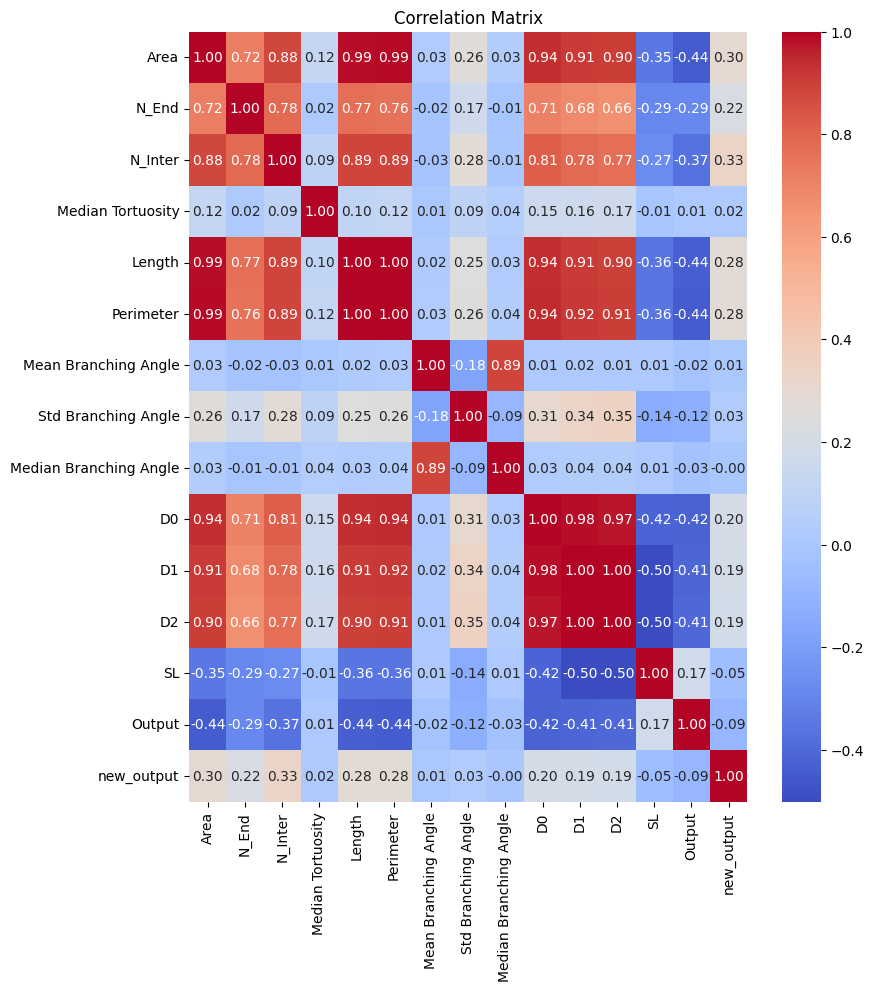

In [839]:
plt.figure(figsize=(9,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [840]:
new_correlation_matrix = new_df.corr()


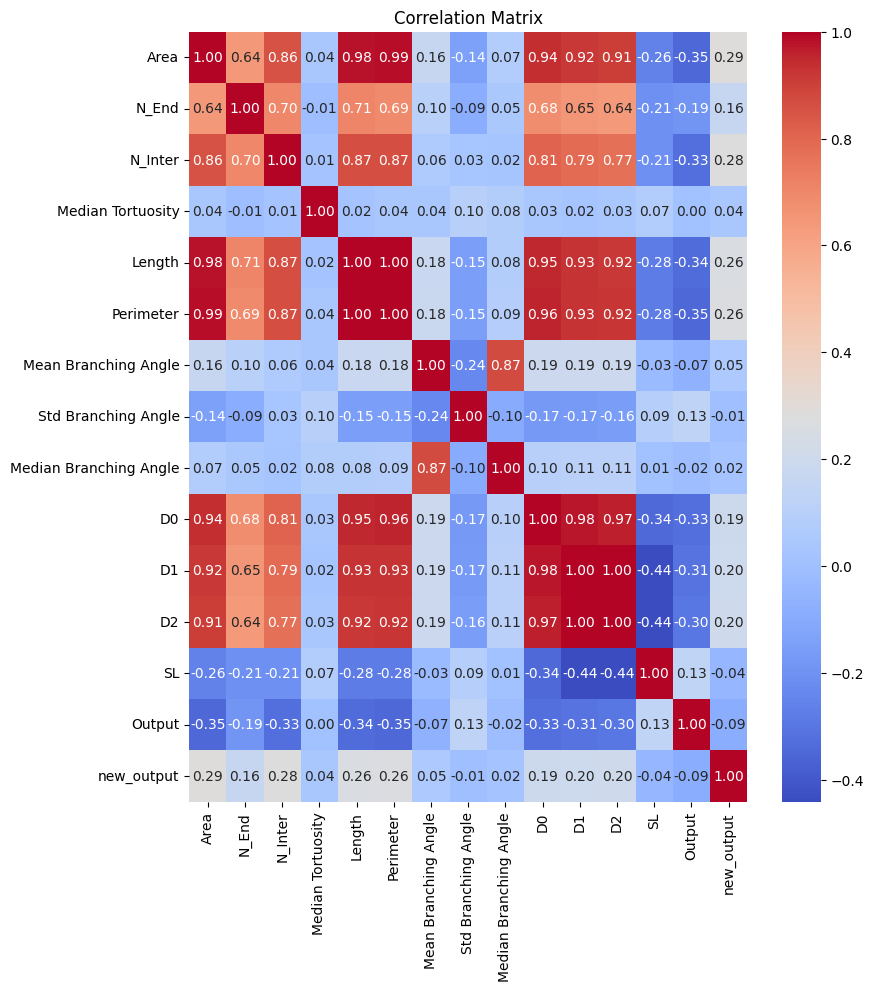

In [841]:
plt.figure(figsize=(9,10))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [842]:
ts = new_df[['Area','N_End','N_Inter','Length','Perimeter','D0','D1','D2','SL','Output','new_output']]

In [843]:
ts

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL,Output,new_output
3,12300,82,78,2156.493714,4735.494008,1.225766,1.269581,1.277442,0.384346,1,0
4,29475,135,116,4339.403888,9280.847973,1.318766,1.276331,1.267225,1.489503,1,0
5,13678,125,54,2723.400877,5680.436359,1.254900,1.251174,1.241717,1.079014,1,0
7,10959,93,45,2039.116018,4039.636144,1.119968,1.113536,1.110526,1.402868,1,0
8,21032,130,64,3781.024569,7663.436718,1.299718,1.281726,1.266724,1.033799,1,0
...,...,...,...,...,...,...,...,...,...,...,...
536,56607,250,290,9132.181732,19168.568100,1.524079,1.485297,1.461445,0.866946,0,0
538,29244,209,128,5229.830163,10626.533400,1.389114,1.372738,1.360155,0.648233,0,0
539,62625,221,325,11092.361080,22488.441830,1.560200,1.550929,1.532844,0.505882,0,1
540,21828,151,108,4484.561444,9088.274380,1.348828,1.430518,1.423908,0.095528,0,0


In [844]:
ts = ts.fillna(ts.mean())

In [845]:
np.where(pd.isnull(ts))

(array([], dtype=int64), array([], dtype=int64))

In [846]:
np.where(pd.notnull(ts))

(array([  0,   0,   0, ..., 386, 386, 386]),
 array([ 0,  1,  2, ...,  8,  9, 10]))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the mar

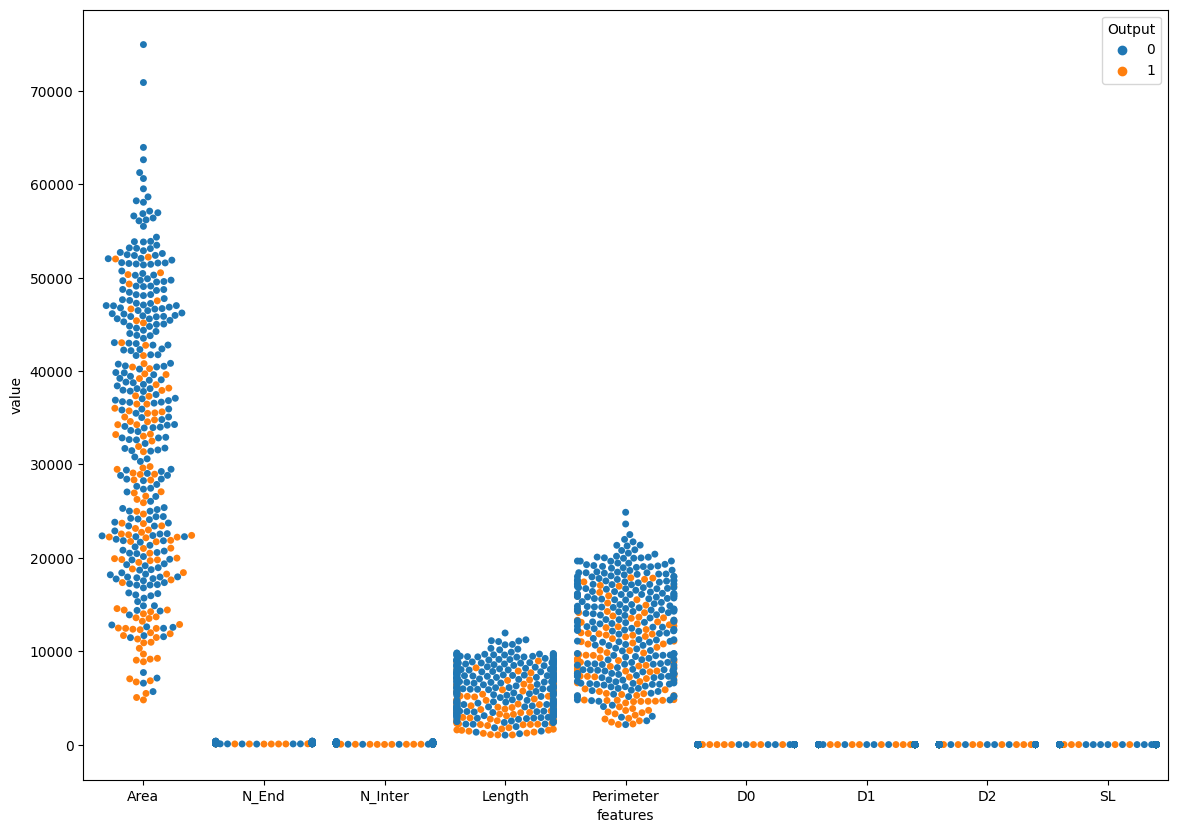

In [847]:
from seaborn import swarmplot

fig, ax = plt.subplots(figsize=(14,10))

data_to_plot = pd.melt(ts[['Area','N_End','N_Inter','Length','Perimeter','D0','D1','D2','SL','Output']],
                       id_vars='Output',
                       var_name='features',
                       value_name='value')

swarmplot(data=data_to_plot, x='features', y='value', hue='Output',ax= ax);

In [848]:
ts['Output'].value_counts()

Output
0    267
1    120
Name: count, dtype: int64

In [849]:
ts['new_output'].value_counts()

new_output
0    380
1      7
Name: count, dtype: int64

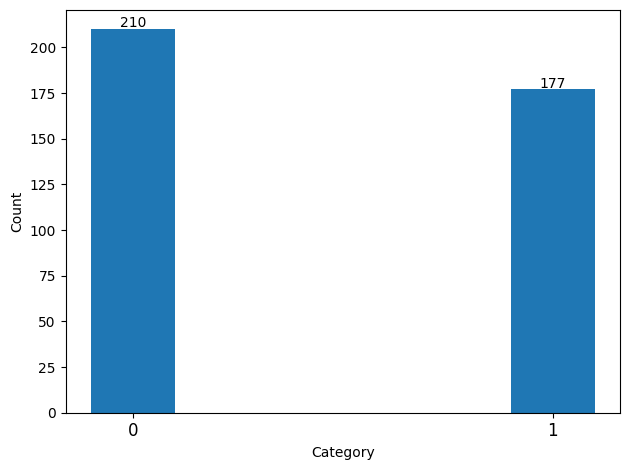

In [850]:
fig, ax = plt.subplots()

x = [0, 1]
y = [210,177]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticks([0,1])
ax.set_xticklabels([0,1], fontsize=12)

for index, value in enumerate(y):
    plt.text(x=int(index), y=value+1, s=str(value), ha='center')

plt.tight_layout()

In [851]:
np.where(pd.isnull(df))

(array([  0,   0,   0,   6,   6,   6,  18,  18,  18,  26,  26,  26,  27,
         27,  27,  51,  51,  51,  90,  90,  90,  91,  91,  91,  96,  96,
         96, 106, 106, 106, 114, 114, 114, 122, 122, 122, 142, 142, 142,
        154, 154, 154, 156, 156, 156, 163, 163, 163, 168, 168, 168, 173,
        173, 173, 181, 181, 181, 190, 190, 190, 194, 194, 194, 201, 201,
        201, 212, 212, 212, 234, 234, 234, 248, 248, 248, 258, 258, 258,
        281, 281, 281, 329, 329, 329, 354, 354, 354, 444, 444, 444, 482,
        482, 482, 489, 489, 489, 527, 527, 527]),
 array([6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6,
        7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7,
        8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8,
        6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8, 6,
        7, 8, 6, 7, 8, 6, 7, 8, 6, 7, 8]))

In [852]:
from ydata_profiling import ProfileReport
profile = ProfileReport(new_df, title="Profiling Report")
profile.to_file("new_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Train/test split**

In [853]:
ts

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL,Output,new_output
3,12300,82,78,2156.493714,4735.494008,1.225766,1.269581,1.277442,0.384346,1,0
4,29475,135,116,4339.403888,9280.847973,1.318766,1.276331,1.267225,1.489503,1,0
5,13678,125,54,2723.400877,5680.436359,1.254900,1.251174,1.241717,1.079014,1,0
7,10959,93,45,2039.116018,4039.636144,1.119968,1.113536,1.110526,1.402868,1,0
8,21032,130,64,3781.024569,7663.436718,1.299718,1.281726,1.266724,1.033799,1,0
...,...,...,...,...,...,...,...,...,...,...,...
536,56607,250,290,9132.181732,19168.568100,1.524079,1.485297,1.461445,0.866946,0,0
538,29244,209,128,5229.830163,10626.533400,1.389114,1.372738,1.360155,0.648233,0,0
539,62625,221,325,11092.361080,22488.441830,1.560200,1.550929,1.532844,0.505882,0,1
540,21828,151,108,4484.561444,9088.274380,1.348828,1.430518,1.423908,0.095528,0,0


In [854]:
from sklearn.model_selection import train_test_split

X = ts.drop(['Output','new_output'], axis=1)
y = ts['new_output']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [855]:
X

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL
3,12300,82,78,2156.493714,4735.494008,1.225766,1.269581,1.277442,0.384346
4,29475,135,116,4339.403888,9280.847973,1.318766,1.276331,1.267225,1.489503
5,13678,125,54,2723.400877,5680.436359,1.254900,1.251174,1.241717,1.079014
7,10959,93,45,2039.116018,4039.636144,1.119968,1.113536,1.110526,1.402868
8,21032,130,64,3781.024569,7663.436718,1.299718,1.281726,1.266724,1.033799
...,...,...,...,...,...,...,...,...,...
536,56607,250,290,9132.181732,19168.568100,1.524079,1.485297,1.461445,0.866946
538,29244,209,128,5229.830163,10626.533400,1.389114,1.372738,1.360155,0.648233
539,62625,221,325,11092.361080,22488.441830,1.560200,1.550929,1.532844,0.505882
540,21828,151,108,4484.561444,9088.274380,1.348828,1.430518,1.423908,0.095528


In [856]:
y


3      0
4      0
5      0
7      0
8      0
      ..
536    0
538    0
539    1
540    0
541    0
Name: new_output, Length: 387, dtype: int64

### **NORAMALIZE AND RANDOMIZE**

In [857]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [858]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [859]:
np.round(X_train.describe(), 1)

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL
count,309.0,309.0,309.0,309.0,309.0,309.0,309.0,309.0,309.0
mean,32694.3,181.5,134.6,5742.4,11855.6,1.4,1.4,1.4,0.8
std,14495.9,70.8,68.5,2513.7,5081.6,0.1,0.1,0.1,0.4
min,4782.0,55.0,17.0,1013.4,2139.5,1.0,1.0,1.0,0.0
25%,20499.0,131.0,77.0,3639.7,7602.8,1.3,1.3,1.3,0.6
50%,33244.0,168.0,126.0,5689.7,11969.0,1.4,1.4,1.4,0.7
75%,44815.0,227.0,179.0,7698.2,16074.7,1.5,1.5,1.5,1.2
max,74958.0,369.0,333.0,11949.5,24874.9,1.6,1.6,1.5,1.7


In [860]:
np.round(X_train_scaled.describe(), 1)

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL
count,309.0,309.0,309.0,309.0,309.0,309.0,309.0,309.0,309.0
mean,0.4,0.4,0.4,0.4,0.4,0.7,0.7,0.7,0.5
std,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.2,0.2,0.2,0.2,0.5,0.6,0.6,0.3
50%,0.4,0.4,0.3,0.4,0.4,0.7,0.7,0.7,0.4
75%,0.6,0.5,0.5,0.6,0.6,0.8,0.9,0.9,0.7
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [861]:
X_train_scaled

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL
0,0.404925,0.308917,0.512658,0.443771,0.432344,0.675308,0.711774,0.710316,0.714257
1,0.098082,0.226115,0.110759,0.124031,0.116476,0.287619,0.381223,0.413432,0.342926
2,0.534613,0.350318,0.541139,0.586212,0.594292,0.843544,0.883709,0.872475,0.253032
3,0.457407,0.353503,0.363924,0.564745,0.542724,0.782978,0.802353,0.790530,0.462062
4,0.689153,0.678344,0.772152,0.783829,0.770329,0.902791,0.956026,0.985059,0.367228
...,...,...,...,...,...,...,...,...,...
304,0.443756,0.426752,0.329114,0.482162,0.481658,0.751702,0.797407,0.814000,0.414700
305,0.575296,0.321656,0.414557,0.558783,0.562566,0.797080,0.838783,0.841207,0.309100
306,0.570466,0.407643,0.370253,0.605416,0.586937,0.819603,0.861091,0.866144,0.345640
307,0.395078,0.318471,0.503165,0.431281,0.447755,0.722787,0.770229,0.777816,0.276867


In [862]:
X_test_scaled

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL
0,0.585029,0.834395,0.696203,0.656169,0.639939,0.876387,0.854443,0.848835,0.504064
1,0.265447,0.328025,0.303797,0.235045,0.240105,0.491883,0.502061,0.500080,0.855039
2,0.185092,0.187898,0.117089,0.246477,0.221231,0.442785,0.488744,0.484718,0.746660
3,0.640518,0.538217,0.610759,0.751120,0.755022,0.903224,0.904690,0.889972,0.384569
4,0.227143,0.353503,0.401899,0.202003,0.210900,0.483101,0.669068,0.694579,0.001621
...,...,...,...,...,...,...,...,...,...
73,0.672894,0.442675,0.689873,0.658629,0.650907,0.825983,0.871231,0.887998,0.443653
74,0.431629,0.525478,0.313291,0.496775,0.491051,0.745718,0.787321,0.793618,0.357450
75,0.259376,0.490446,0.325949,0.281596,0.274080,0.577433,0.608785,0.574572,0.181884
76,0.722654,0.458599,0.930380,0.735420,0.736596,0.888298,0.894642,0.899561,0.467567


In [863]:
X_train_random = X_train_scaled.sample(frac=1, random_state=42)  # frac=1 means 100% of the data is sampled
X_train_random

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL
288,0.228426,0.232484,0.319620,0.266245,0.257361,0.561465,0.550827,0.540218,0.849252
9,0.110779,0.162420,0.101266,0.072133,0.084809,0.133335,0.163787,0.172231,0.746660
57,0.637711,0.691083,0.655063,0.696530,0.670652,0.888534,0.871800,0.854085,0.481018
60,0.513153,0.675159,0.601266,0.596370,0.572633,0.782279,0.810833,0.819486,0.467163
25,0.243516,0.468153,0.224684,0.266800,0.275745,0.518533,0.569603,0.590932,0.809580
...,...,...,...,...,...,...,...,...,...
188,0.618388,0.786624,0.882911,0.727132,0.727277,0.896338,0.886987,0.874268,0.559215
71,0.626354,0.621019,0.525316,0.731883,0.709176,0.917601,0.910754,0.901811,0.566932
106,0.481005,0.219745,0.512658,0.540677,0.541736,0.749414,0.788134,0.789809,0.370014
270,0.187557,0.245223,0.136076,0.196702,0.194091,0.498075,0.501295,0.506885,0.834820


In [864]:
X_test_random = X_test_scaled.sample(frac=1, random_state=42)  # frac=1 means 100% of the data is sampled
X_test_random

,Area,N_End,N_Inter,Length,Perimeter,D0,D1,D2,SL
33,0.588891,0.697452,0.655063,0.693656,0.679002,0.870455,0.913542,0.910575,0.361319
0,0.585029,0.834395,0.696203,0.656169,0.639939,0.876387,0.854443,0.848835,0.504064
34,0.249088,0.108280,0.189873,0.281892,0.279550,0.592999,0.642686,0.660608,0.286903
12,0.348581,0.490446,0.351266,0.385553,0.373295,0.660191,0.686398,0.688460,0.370651
10,0.567373,0.382166,0.446203,0.509988,0.523839,0.735417,0.767271,0.789824,0.406881
...,...,...,...,...,...,...,...,...,...
20,0.504845,0.191083,0.303797,0.464246,0.480098,0.691756,0.734083,0.755922,0.409874
60,0.194254,0.471338,0.189873,0.255174,0.248527,0.526409,0.579420,0.588241,0.250585
71,0.367889,0.668790,0.446203,0.430300,0.426024,0.707309,0.724093,0.733240,0.333484
14,0.689766,0.649682,0.607595,0.772184,0.753369,0.906079,0.880988,0.860602,0.523477


### **FEATURE SELECTION**

In [865]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score


gbc = GradientBoostingClassifier(max_depth=5, random_state=42)


gbc.fit(X_train_random, y_train)


preds = gbc.predict(X_test_random)


f1_score_all = round(f1_score(y_test, preds, average='weighted'), 2)

print(f1_score_all)

0.95


###**K-best features**

In [866]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train_scaled.copy(), X_test_scaled.copy(), y_train.copy(), y_test.copy()

In [867]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1, 10):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)

    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)

    gbc.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)

    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds, average='weighted'), 2)

    f1_score_list.append(f1_score_kbest)

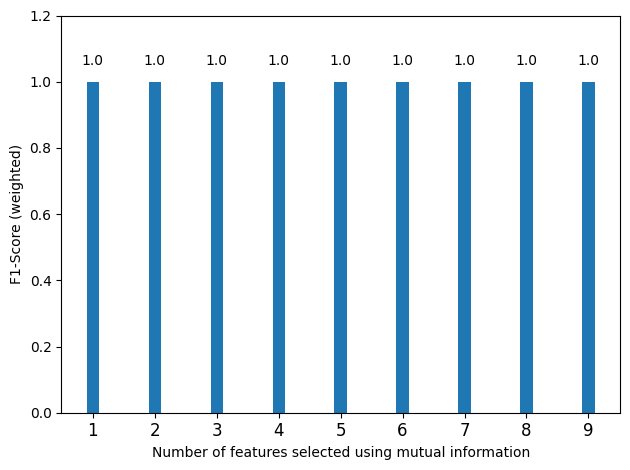

In [868]:
fig, ax = plt.subplots()

x = np.arange(1, 10)
y = f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 10))
ax.set_xticklabels(np.arange(1, 10), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

### **Recursive feature elimination**

In [869]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train_scaled.copy(), X_test_scaled.copy(), y_train.copy(), y_test.copy()

In [870]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

for k in range(1, 10):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, y_train_v3)

    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)

    gbc.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)

    f1_score_rfe = round(f1_score(y_test_v3, RFE_preds, average='weighted'), 2)

    rfe_f1_score_list.append(f1_score_rfe)

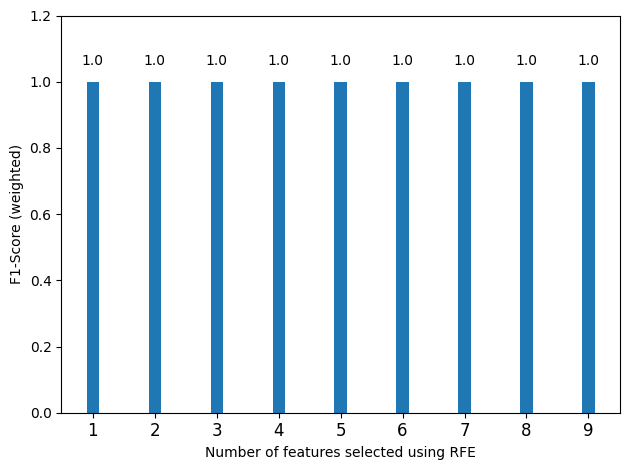

In [871]:
fig, ax = plt.subplots()

x = np.arange(1, 10)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 10))
ax.set_xticklabels(np.arange(1, 10), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

### **SMOTE(OVER SAMPLING)**

In [872]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_random, y_train)
# Before SMOTE
print("Original class distribution:\n", y_train.value_counts())

# After SMOTE
print("Resampled class distribution:\n", y_smote.value_counts())

Original class distribution:
 new_output
0    303
1      6
Name: count, dtype: int64
Resampled class distribution:
 new_output
0    303
1    303
Name: count, dtype: int64


(array([303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 303.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

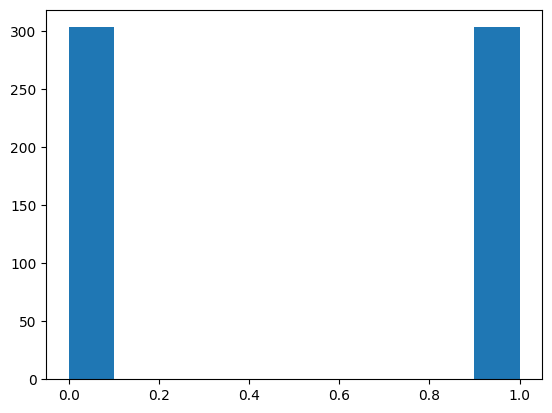

In [873]:
plt.hist(y_smote)

In [874]:
from ydata_profiling import ProfileReport
profile = ProfileReport(X_smote, title="Profiling Report")
profile.to_file("X_smote.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **ACCURACY ALL MODELS**

### **XGBOOST**

In [875]:

param_grid = {
    'n_estimators': [50],
    'max_depth': [5],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1,5,10,20]  ,
    'reg_alpha': [0.1],
    'reg_lambda': [0,1,10,100],
    'gamma': [0, 0.1, 1],
    'min_child_weight': [ 3 ]
}

xgb_model = xgb.XGBClassifier()


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_smote, y_smote)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'gamma': 0.1, 'learning_rate': 1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 10}
Best Score: 0.9587458745874587


### **KNN**

In [876]:


model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.950464 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.950464 (0.028982) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.950464 (0.028982) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.919672 (0.034870) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.921321 (0.034347) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.908060 (0.037794) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.909709 (0.036331) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.889353 (0.037936) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.893752 (0.040191) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.879973 (0.037993) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.887696 (0.035557) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.866794 (

### **SVM**

In [877]:

model = SVC()
kernel = [ 'rbf']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.963124 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.963124 (0.022129) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.958179 (0.026216) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.919080 (0.036452) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.823907 (0.045931) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.758971 (0.047584) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}


### **LOGISTIC REGRESSION**

In [878]:

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.796366 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796366 (0.052519) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796366 (0.052519) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796366 (0.052519) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.782614 (0.049360) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.776530 (0.055360) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776530 (0.055360) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.776530 (0.055360) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.775984 (0.055497) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.778752 (0.056064) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.779308 (0.056024) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.778752 (0.055566) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.778752 (0.056064) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.759016 (0.052083) with: {'C': 0.1

### **RIDGE CLASSIFIER**

In [879]:

model = RidgeClassifier(solver='auto', tol=0.001)
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,15]


grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.784253 using {'alpha': 0.1}
0.784253 (0.053382) with: {'alpha': 0.1}
0.779299 (0.053150) with: {'alpha': 0.2}
0.777641 (0.052776) with: {'alpha': 0.3}
0.777067 (0.055107) with: {'alpha': 0.4}
0.778169 (0.054415) with: {'alpha': 0.5}
0.777077 (0.053228) with: {'alpha': 0.6}
0.778743 (0.053485) with: {'alpha': 0.7}
0.779845 (0.052218) with: {'alpha': 0.8}
0.780947 (0.052826) with: {'alpha': 0.9}
0.781494 (0.051771) with: {'alpha': 1.0}
0.777113 (0.056302) with: {'alpha': 10}
0.777678 (0.055423) with: {'alpha': 15}


### **BAGGING CLASSIFIER**

In [880]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
n_estimators = [10, 100, 1000]

grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.962559 using {'n_estimators': 10}
0.962559 (0.020946) with: {'n_estimators': 10}
0.962031 (0.022223) with: {'n_estimators': 100}
0.960938 (0.025735) with: {'n_estimators': 1000}


### **RANDOM FOREST CLASSIFIER**

In [881]:

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.964791 using {'max_features': 'log2', 'n_estimators': 1000}
0.963661 (0.026886) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.963142 (0.024804) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.962596 (0.023404) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.960956 (0.021462) with: {'max_features': 'log2', 'n_estimators': 10}
0.962605 (0.024836) with: {'max_features': 'log2', 'n_estimators': 100}
0.964791 (0.023726) with: {'max_features': 'log2', 'n_estimators': 1000}


### **GRADIENT BOOSTING CLASSIFIER**

In [882]:

model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.962040 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.896548 (0.029813) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.904772 (0.035377) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.901494 (0.032623) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.899836 (0.034133) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.900947 (0.032479) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.900947 (0.032753) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.947705 (0.024223) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.5}
0.945492 (0.028069) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.7}
0.943871 (0.029058) with: {'learning_rate': 0.001, 'max_de

### **ENSEMBLE LEARNING**

In [883]:


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [884]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import StackingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

def get_stacking():
    level0 = list()
    level0.append(('knn', KNeighborsClassifier(n_neighbors=5)))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bagging', BaggingClassifier()))
    level0.append(('random_forest', RandomForestClassifier()))
    level0.append(('ridge', RidgeClassifier()))
    level0.append(('gradient_boosting', GradientBoostingClassifier()))
    level0.append(('xgboost', xgb.XGBClassifier()))

    level1 = RidgeClassifier()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


def get_models():
    models = dict()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bagging'] = BaggingClassifier()
    models['random_forest'] = RandomForestClassifier()
    models['ridge'] = RidgeClassifier()
    models['gradient_boosting'] = GradientBoostingClassifier()
    models['xgboost'] = xgb.XGBClassifier()
    models['stacking'] = get_stacking()
    return models


def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


models = get_models()


results, names = list(), list()
best_params = {}
for name, model in models.items():
    if name in ['knn', 'svm', 'bagging', 'random_forest', 'ridge', 'gradient_boosting', 'xgboost']:
        param_grid = {}
        if name == 'knn':
            param_grid = {
                'n_neighbors': range(1, 21, 2),
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan', 'minkowski']
            }
        elif name == 'svm':
            param_grid = {
                'kernel': ['poly', 'rbf', 'sigmoid'],
                'C': [50, 10, 1.0, 0.1, 0.01],
                'gamma': ['scale']
            }
        elif name == 'bagging':
            param_grid = {
                'n_estimators': [10, 100, 1000]
            }
        elif name == 'random_forest':
            param_grid = {
                'n_estimators': [10, 100, 1000],
                'max_features': ['sqrt', 'log2']
            }
        elif name == 'ridge':
            param_grid = {
                'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 15]
            }
        elif name == 'gradient_boosting':
            param_grid = {
                'n_estimators': [10, 100],
                'learning_rate': [0.001, 0.01, 0.1],
                'subsample': [0.5, 0.7, 1.0],
                'max_depth': [3, 7, 9]
            }
        elif name == 'xgboost':
            param_grid = {
                'n_estimators': [10,100],
                'max_depth': [1, 3, 5, 7, 9, 11],
                'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                'reg_alpha': [0.1],
                'reg_lambda': [0, 1, 10, 100],
                'gamma': [0, 0.1, 1],
                'min_child_weight': [1, 3, 5, 7, 9, 11]
            }

        grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
        grid_search.fit(X_smote, y_smote)
        best_params[name] = grid_search.best_params_
        model = grid_search.best_estimator_
    scores = evaluate_model(model, X_smote, y_smote)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

print("Best parameters:", best_params)


plt.show()




>knn 0.950 (0.029)
>cart 0.958 (0.024)
>svm 0.965 (0.022)
>bagging 0.963 (0.024)
>random_forest 0.964 (0.024)
>ridge 0.784 (0.053)
>gradient_boosting 0.959 (0.035)
>xgboost 0.960 (0.029)
>stacking 0.967 (0.025)
Best parameters: {'knn': {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}, 'svm': {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}, 'bagging': {'n_estimators': 1000}, 'random_forest': {'max_features': 'sqrt', 'n_estimators': 1000}, 'ridge': {'alpha': 0.1}, 'gradient_boosting': {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}, 'xgboost': {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1}}


### **BAR PLOT OF ALL ACCURACIES**

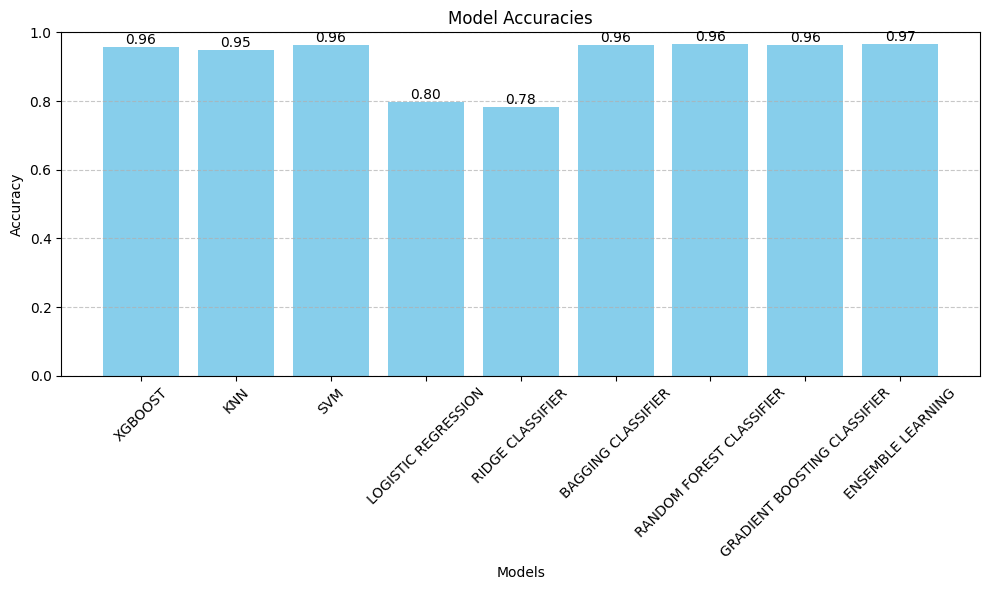

In [888]:
model_names = ['XGBOOST', 'KNN', 'SVM','LOGISTIC REGRESSION','RIDGE CLASSIFIER','BAGGING CLASSIFIER','RANDOM FOREST CLASSIFIER','GRADIENT BOOSTING CLASSIFIER','ENSEMBLE LEARNING']
accuracies = [0.958, 0.95, 0.963,0.796,0.784,0.963,0.965,0.962,0.967]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()